# Tarea 4 - Machine Learning

In [13]:
#Librerias y funciones utilizadas en la tarea

import numpy as np
import numpy.linalg as npl
import sympy
from sympy import *
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import os
import pandas as pd

def f(x,y):
    return (3 * (x ** 2)) + (2 * x * y) + (15 * x) + (6 * (y ** 2)) - y

def gradDesc(grad, p_inicio, paso_weight = .085, prec = .01, max_iter = 3000, initError = 10):
    #Config inicial
    x,y = p_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])

    #Iteraciones
    while npl.norm(error) > prec and currIter<max_iter:
        currIter += 1 #Incremento contador
        prevX = currX.copy() #registro de ultimo error
        
        #Ecuacion grad Descenciente
        currX -= paso_weight * np.array(grad(x,y)) #Nuevo X = (anterior) - (tam paso *  grad(anterior))
        x,y = currX[0].copy(),currX[1].copy() #Actualizar X

        error = currX - prevX #Error basado en el peso y grad
        iterCoords.append(np.hstack([x,y]))
    return currIter, currX, np.vstack(iterCoords)

## Ejercicio 1

Utilizando la herramienta Jupyter Notebook y el lenguaje de programación de Python, realiza la siguiente actividad:

Considera la función $f(x,y) = 3x^{2}+2xy+15x+6y^{2}-y$, comenzando desde el punto inicial $(x,y)=(-2,3)$, encuentra el mínimo valor estimado para el cual esta funcion converge

In [31]:
x,y = symbols("x y")

punto_inicio = np.vstack([-2,3])
funcion = (3*(x**2))+(2*x*y)+(15*x)+(6*(y**2))-y
funcion

3*x**2 + 2*x*y + 15*x + 6*y**2 - y

In [33]:
f = lambdify('x,y',funcion)

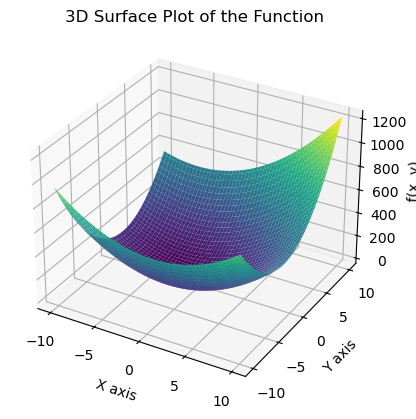

In [21]:
# Create a meshgrid for x and y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('f(x, y)')
ax.set_title('Gráfica de función')

# Show the plot
plt.show()

In [37]:
#Busqueda de gradiente
#Derivada parcial sobre x
f1x = funcion.diff(x)
f1xlam = lambdify('x,y', f1x)
#Derivada parcial sobre y
f1y = funcion.diff(y)
f1ylam = lambdify('x,y',f1y)
f1 = [f1x,f1y]
grad = lambdify('x,y',f1)

In [45]:
pasos_totales, coord_fin, coord_int = gradDesc(grad, punto_inicio)

In [47]:
print(pasos_totales)

4


In [49]:
print(coord_fin)

[[-2.68208632]
 [ 0.53118189]]


In [53]:
coord_int[:5]

array([[-2.        ,  3.        ],
       [-2.765     ,  0.365     ],
       [-2.6919    ,  0.54775   ],
       [-2.6871485 ,  0.531668  ],
       [-2.68208632,  0.53118189]])

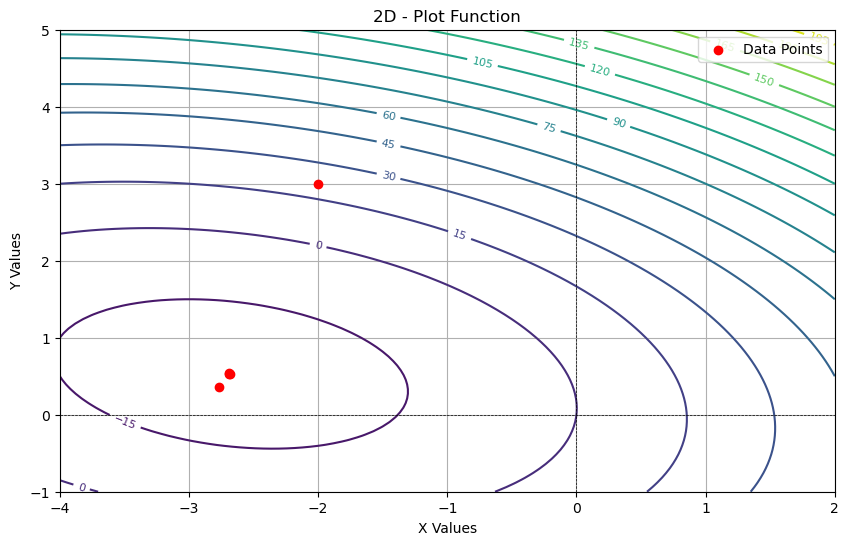

In [65]:
x_points = coord_int[:, 0]  # First column
y_points = coord_int[:, 1]  # Second column

x = np.linspace(-4, 2, 100)
y = np.linspace(-1, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values for the contour
Z = f(X, Y)

# Create the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)  # Add labels to contours

# Plot the points from your array
plt.scatter(x_points, y_points, color='red', label='Data Points', zorder=5)


plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('2D - Plot Function')
plt.axhline(0, color='black', lw=0.5, ls='--')  # Horizontal line at y=0
plt.axvline(0, color='black', lw=0.5, ls='--')  # Vertical line at x=0
plt.grid()
plt.legend()
plt.show()

## Ejercicio 2 

Es muy común identificar situaciones donde se deben realizar optimizaciones para encontrar el óptimo de una función dado un conjunto de restricciones iniciales. Identifica una problemática que cumpla con estas condiciones en tu entorno laboral y desarrolla un ejemplo completo en donde obtengas la solución utilizando el lenguaje de programación Python. Considera que dicho ejemplo se compartirá con el resto de tus compañeros a modo de presentación digital.

En general, este tipo de problemas se utiliza para encontrar cierto valor donde se maximize dicho. Esto aplica para cualquier situación y en cualquier campo, tales como:
- Banco: Maximizar utilidades de ciertas inversiones sujeta a algunos valores invertidos en casas de bolsa, inversores, etc. Dentro de esta industria he participado en proyectos que buscan minimizar los costos de inversión en los productos del banco, al ser distintos productos, cada producto tiene distintas restricciones que dependen de varias variables. Por ejemplo, los productos de TDC (Tarjeta de Crédito) tienen la restricción de solo utilizar clientes que pertenezcan a cierto tipo de tarjeta (Clásica, Oro y Platino), los productos de Hipotecario que sean clientes que estén en cierta región del país, etc.
- Ciencia: En algún proyecto que participé en la universidad Iberoamericana, se buscaba minimizar el registro de contaminación en las instalaciones de la escuela, sin embargo, al tener distintas zonas y vías de acceso con alta demanda de coches, las restricciones iban desde el número de alumnos que ingresaban por una puerta, hasta el número de coches que se estacionaban en X estacionamiento.
  

Para mostrar el ejemplo, utilizaré el primer ejemplo práctico con datos ficticios por temas de confidencialidad del banco.

La idea consta en maximizar el ingreso de utilidades generado por los productos pertenecientes al portafolio de TDC (Originación, Balance Transfer, Incremento Linea) mientras se respetan las restricciones que presenta cada producto. Cada producto genera costos e ingresos, por ende, se ve de la siguiente manera. Cabe mencionar que, dependiendo de la restricción del área que solicite los resultados, usualmente se suele solicitar que los costos no superen n solicitudes, lo declararemos como 100:

- Originación: Costo 4,000 MMP, Ingreso 5,000 MMP 
- Balance Transfer: Costo 3,500 MMP, Ingreso 4,000 MMP 
- Incremento Linea: Costo 1,000 MMP, Ingreso 1,500 MMP

Por ende, se busca maximizar la siguiente ecuación:

$$PTDC = 5000_{OR}+4000_{BT}+1500_{IL}$$

Sujeto a:

$$4000_{OR}+3500_{BT}+1000_{IL}<=100$$

In [9]:
#Solucion en python
import pulp

In [18]:
PTDC = pulp.LpProblem("Maximizar_Ingreso", pulp.LpMaximize)

# Variables binarias para los proyectos
OR = pulp.LpVariable('OR', cat='Binary')
BT = pulp.LpVariable('BT', cat='Binary')
IL = pulp.LpVariable('IL', cat='Binary')

# Función objetivo
PTDC += 5000 * OR + 4000 * BT + 1500 * IL, "Ingresos de Portafolio TDC"

# Restricción de horas
PTDC += 4000 * OR + 3000 * BT + 1000 * IL <= 1000, "Restriccion_solicitudes"

# Resolver el problema
PTDC.solve()

# Mostrar resultados
print(f"Estado: {pulp.LpStatus[PTDC.status]}")
print(f"Proyecto A: {'Sí' if OR.varValue == 1 else 'No'}")
print(f"Proyecto B: {'Sí' if BT.varValue == 1 else 'No'}")
print(f"Proyecto C: {'Sí' if IL.varValue == 1 else 'No'}")
print(f"Ingreso Total: ${pulp.value(PTDC.objective)}")

Estado: Optimal
Proyecto A: No
Proyecto B: No
Proyecto C: Sí
Ingreso Total: $1500.0


## Ejercicio 4

Lee el siguiente artículo y responde a las preguntas:

http://bibliotecadigital.udea.edu.co/bitstream/10495/20164/1/CarmonaMaricela_2021_DeteccionFraudeFinanciero.pdf

Con base en el artículo de la pregunta 4, utiliza la herramienta AutoAI de la plataforma IBM Watson Studio y genera un modelo de aprendizaje automático que evalúe el mismo conjunto de datos analizados en el material. Compara los criterios de selección del modelo que fueron considerados por el autor del artículo y las métricas entregadas por la aplicación AutoAI. Incluye tus conclusiones en el informe electrónico de la actividad

Con el fin de tener un EDA (Exploratory Data Analysis), incluiré lo encontrado en este notebook y los resultados en el documento pdf donde se resuma todo lo realizado en este ejercicio

In [70]:
#Funciones
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [8]:
os.getcwd()

'D:\\Master IA y Machine Learning\\Modulo2\\Tarea 4'

In [15]:
df = pd.read_csv(r'D:\Master IA y Machine Learning\Modulo2\Tarea 4\archive (2)\data_raw.csv')

In [21]:
#Esto quiere decir que se cuentan con 11 columnas (variables) y 6,362,620 registros
df.shape

(6362620, 11)

In [16]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [51]:
#Realizaré un plot de las variables que contengan menos de 50 valores únicos, por ejemplo:
len(df['step'].unique()) #NO - 743 datos únicos
len(df['type'].unique()) #SI - 5 datos únicos
len(df['amount'].unique()) #NO - 5,316,900
len(df['nameOrig'].unique()) #NO - 6,353,307
len(df['oldbalanceOrg'].unique()) #NO - 1,845,844
len(df['newbalanceOrig'].unique()) #NO - 2,682,586
len(df['nameDest'].unique()) #NO - 2,722,362
len(df['oldbalanceDest'].unique()) #NO - 3,614,697
len(df['newbalanceDest'].unique()) #NO - 3,555,499
len(df['isFraud'].unique()) #SI - 2
len(df['isFlaggedFraud'].unique()) #SI - 2

#Solo será type, isFraud, isFlaggedFraud

2

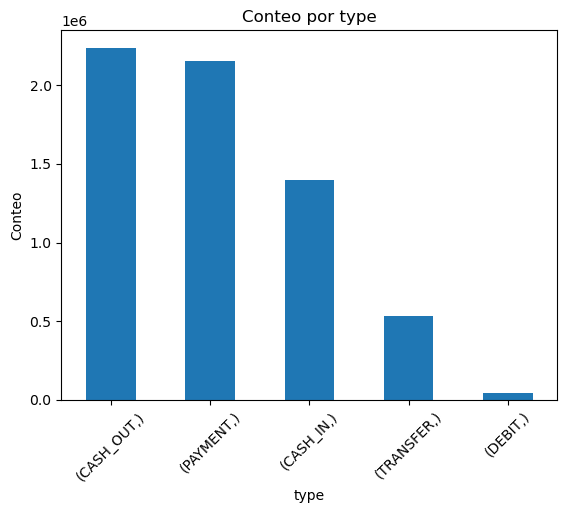

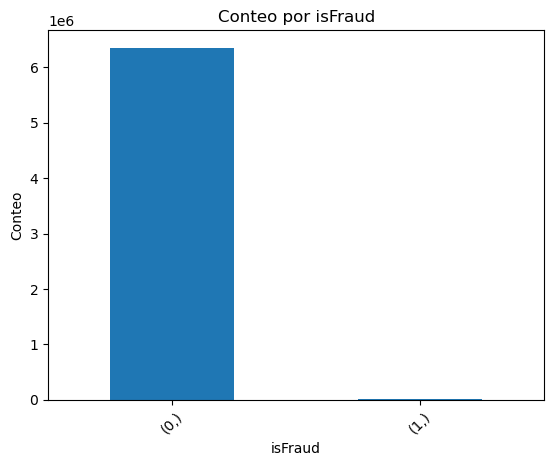

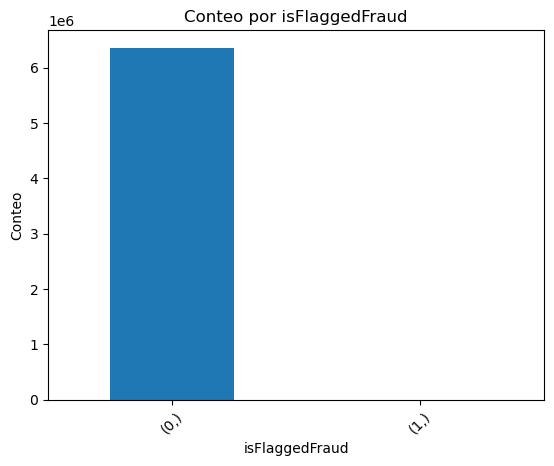

In [131]:
#Variable Step
list_plot = ['type','isFraud','isFlaggedFraud']
for i in range(len(list_plot)):
    conteos = pd.DataFrame(df[f'{list_plot[i]}']).value_counts()
    conteos.plot(kind='bar')
    plt.title(f'Conteo por {list_plot[i]}')
    plt.xlabel(f'{list_plot[i]}')
    plt.ylabel('Conteo')
    plt.xticks(rotation = 45)
    plt.show()